#자연어처리 : Word2Vec 실습
#실습일 : 2021-12-02
#인공지능융합전공 2017312072 정주호


1. Skip-gram : 옆에 위치한 단어들을 묶어서 이해

In [1]:
corpus = [
'he is a king',
'she is a queen',
'he is a man',
'she is a woman',
'warsaw is poland capital',
'berlin is germany capital',
'paris is france capital',
]
def tokenize_corpus(corpus):
  tokens = [x.split() for x in corpus]
  return tokens
tokenized_corpus = tokenize_corpus(corpus)

In [2]:
print(tokenized_corpus)

[['he', 'is', 'a', 'king'], ['she', 'is', 'a', 'queen'], ['he', 'is', 'a', 'man'], ['she', 'is', 'a', 'woman'], ['warsaw', 'is', 'poland', 'capital'], ['berlin', 'is', 'germany', 'capital'], ['paris', 'is', 'france', 'capital']]


In [3]:
vocabulary = []
for sentence in tokenized_corpus:
  for token in sentence:
    if token not in vocabulary:
      vocabulary.append(token)
word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}
vocabulary_size = len(vocabulary)

In [4]:
print(vocabulary)

['he', 'is', 'a', 'king', 'she', 'queen', 'man', 'woman', 'warsaw', 'poland', 'capital', 'berlin', 'germany', 'paris', 'france']


In [5]:
window_size = 2
idx_pairs = []
for sentence in tokenized_corpus: # for each sentence
  indices = [word2idx[word] for word in sentence]
  for center_word_pos in range(len(indices)): # for each word as center word
    for w in range(-window_size, window_size + 1): # for each window position
      context_word_pos = center_word_pos + w

    if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
    # check index is not out of sentence
      continue
    context_word_idx = indices[context_word_pos]
    idx_pairs.append((indices[center_word_pos], context_word_idx))

In [6]:
idx_pairs

[(0, 2),
 (1, 3),
 (4, 2),
 (1, 5),
 (0, 2),
 (1, 6),
 (4, 2),
 (1, 7),
 (8, 9),
 (1, 10),
 (11, 12),
 (1, 10),
 (13, 14),
 (1, 10)]

2. Build Word2Vec using Gensim

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=, size=100, window=5, min_count=5, workers=4, sg=0)
model_result = model.wv.most_similar("man")
print(model_result)

3. Doc2Vec Train using Gensim

In [ ]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from nltk.tokenize import word_tokenize
corpus = [ 'This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?' ]
corpus = [list(word_tokenize(doc)) for doc in corpus]
corpus = [ TaggedDocument(words, ['d{}'.format(idx)])
for idx, words in enumerate(corpus) ]
print(corpus)
model = Doc2Vec(corpus, vector_size=5, min_count=0)
print(model.docvecs[0])

#영어/한국어 word2vec 실습
#참고자료 : https://wikidocs.net/50739

In [8]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [9]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7fc5e2fc3dd0>)

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
  tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
  normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [14]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [15]:
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [16]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [17]:
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

skip-gram을 설정한 새로운 model

sg=1

In [18]:
sg_model = model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=1)

In [19]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.7509255409240723), ('guy', 0.7481964826583862), ('rabbi', 0.7097029685974121), ('michelangelo', 0.6964800357818604), ('soldier', 0.6926549673080444), ('baker', 0.6787580251693726), ('gentleman', 0.6637675166130066), ('unmarried', 0.6620548367500305), ('boy', 0.656219482421875), ('widow', 0.6542507410049438)]


In [20]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [21]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.7509255409240723), ('guy', 0.7481964826583862), ('rabbi', 0.7097029685974121), ('michelangelo', 0.6964800357818604), ('soldier', 0.6926549673080444), ('baker', 0.6787580251693726), ('gentleman', 0.6637675166130066), ('unmarried', 0.6620548367500305), ('boy', 0.656219482421875), ('widow', 0.6542507410049438)]


네이버 영화 리뷰 한국어 word2vec 만들기

In [24]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
     |████████████████████████████████| 448 kB 50.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [26]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fc5bf3a83d0>)

In [27]:
train_data = pd.read_table('ratings.txt')

In [28]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [29]:
len(train_data)

200000

In [30]:
#결측치 없애기 
train_data = train_data.dropna(how='any')
print(train_data.isnull().values.any())

False


In [31]:
len(train_data)

199992

In [32]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [33]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [36]:
# 형태소 분석기 OKT를 사용한 토큰화 작업

from tqdm import tqdm
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [16:03<00:00, 207.60it/s]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


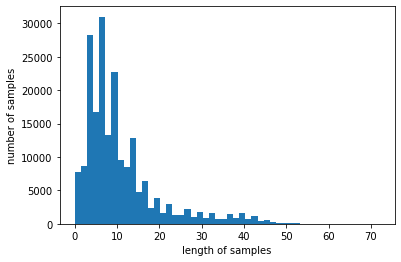

In [37]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [38]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [39]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8634905815124512), ('안성기', 0.8520780801773071), ('최민수', 0.8461692333221436), ('윤제문', 0.8446610569953918), ('유다인', 0.8397340178489685), ('김수현', 0.8395838737487793), ('이정재', 0.8376301527023315), ('이민호', 0.8332740664482117), ('채민서', 0.8118305206298828), ('설경구', 0.8071898221969604)]


In [40]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8620654344558716), ('블록버스터', 0.8610978126525879), ('호러', 0.8576425313949585), ('무협', 0.8536224365234375), ('느와르', 0.8477948904037476), ('무비', 0.8316795825958252), ('블랙', 0.8287302255630493), ('정통', 0.8268140554428101), ('물', 0.8077585101127625), ('물의', 0.8064830303192139)]


In [41]:
print(model.wv.most_similar("사랑"))

[('이별', 0.713044285774231), ('삶다', 0.6825666427612305), ('사람과', 0.6788493990898132), ('불륜', 0.676373302936554), ('삶', 0.6674257516860962), ('어머니', 0.6653773784637451), ('죽음', 0.6557445526123047), ('순수하다', 0.6550904512405396), ('행복', 0.6524393558502197), ('우정', 0.638670802116394)]


In [42]:
print(model.wv.most_similar("짝사랑"))

[('옆집', 0.8675644993782043), ('위험', 0.8634449243545532), ('바람나다', 0.8597623109817505), ('똑', 0.8547912836074829), ('흩어지다', 0.8547053337097168), ('늙은이', 0.8529846668243408), ('구출', 0.8524776697158813), ('플레이보이', 0.8518929481506348), ('밀당', 0.8498479127883911), ('동료', 0.8469412326812744)]
